# Spotify Song Prediction Project
Project mentor: Sophia Sklaviadis

Benjamin Fry <bfry2@jh.edu>, Cassie Parent <cparent5@jh.edu>, Alexandra Szewc <aszewc1@jh.edu>

Link to Project Repo: https://github.com/benf549/CS475-Machine-Learning-Final-Project

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import json

From the challenge dataset downloaded from Spotify's Million Challenge dataset, create a map that links Spotify's identifying URI to a track name and artist name.

In [5]:
# Read in the JSON data
data_stream = ""
with open("challenge_set.json", "r") as f:
    data_stream = f.read()
data_set = json.loads(data_stream)


# Grab unique track/artist pairs
track_uris = set()
for i,j in enumerate(data_set["playlists"]):
    if len(j["tracks"]) == 100:
        for track in j["tracks"]:
            track_uris.add((track["track_name"], track["artist_name"], track["track_uri"]))
unique_tracks = list(track_uris)


uri_to_title_artist_map = {x[2]: (x[0], x[1]) for x in unique_tracks}
for i,(j,k) in enumerate(uri_to_title_artist_map.items()):
    if i > 20: break
    print(j,k)

spotify:track:00xYAFzdikA6wVUnr2FzXZ ('5 on It', 'Khleo Thomas')
spotify:track:0uRlP6bHbSgBGklmaCMqG7 ('Yeah', 'Joe Nichols')
spotify:track:2nBI3iWLhupR7LyAJ5GGkE ('Champions', 'Kanye West')
spotify:track:0fnUKEySs82M4ZjXGIUesP ('Dive', 'Yates')
spotify:track:76viqO3tGyWHYbJgmV2gfN ("Ain't Gonna Leave", 'A R I Z O N A')
spotify:track:0RmH0VjGdppj6vccWhs3x4 ('ABC Café / Red & Black', 'Eddie Redmayne')
spotify:track:2nJcztRCk1TQ0iThxPx7fI ('I Know You Are But What Am I?', 'Mogwai')
spotify:track:3blTwlIOG5KrXP7UnxFTzT ('Power In The Cross - Live', 'Jesus Culture')
spotify:track:6D0uwGXPIixyOSRixEi5Zg ('Safe and Sound', 'Mike Stud')
spotify:track:0tWhOofIoPxkDCeKqAp1cT ('I Hate You', 'Mali Music')
spotify:track:01wpPOPqQ3XyS6hBN00HfK ('In the Morning', 'ZHU')
spotify:track:1RwDsaft1szD0FO3DVEtaT ('The Lost Art Of Keeping A Secret', 'Queens of the Stone Age')
spotify:track:6GeOWfYzB55ViaeZhtpIOm ('Overtime', 'Brika')
spotify:track:6rkAY9rk1NTFB94QxG3LJR ('You And I', 'Lady Gaga')
spotify:t

The following cell takes the "all_downlaoded_data.csv" that was processed in a different notebook and splits it into training and testing datasets.

In [23]:
df = pd.read_csv("all_downloaded_data.csv")
df = df.drop("Unnamed: 0", axis=1)
df = df.set_index('uri')
df = df.iloc[:, 0:10]
df = df.drop_duplicates()
print(df.head())

train = df.iloc[0:40000, :]
test = df.iloc[40000:, :]

                                      danceability  energy  key  loudness  \
uri                                                                         
spotify:track:38uqMByifM0mkjcTbejlyR         0.375   0.294    8    -8.751   
spotify:track:4kOTDj4SiZPkW1p96WMDNv         0.950   0.803    1    -4.195   
spotify:track:1c9LBfX0klXJscJAYDI0Ea         0.758   0.501    0    -7.051   
spotify:track:59iNA6gwthoTJ6IgpBGGHW         0.534   0.749    6    -5.562   
spotify:track:4QCng4MDyUhEZ730Ma2Rjp         0.674   0.744   11    -5.196   

                                      mode  speechiness  acousticness  \
uri                                                                     
spotify:track:38uqMByifM0mkjcTbejlyR     1       0.0329        0.9280   
spotify:track:4kOTDj4SiZPkW1p96WMDNv     1       0.1510        0.1450   
spotify:track:1c9LBfX0klXJscJAYDI0Ea     1       0.0589        0.2520   
spotify:track:59iNA6gwthoTJ6IgpBGGHW     0       0.0749        0.0776   
spotify:track:4QCng4MD

Using the elbow method, we find the optimal number of clusters by plotting the WCSS score vs. number of clusters and looking for the "corner" in the graph.

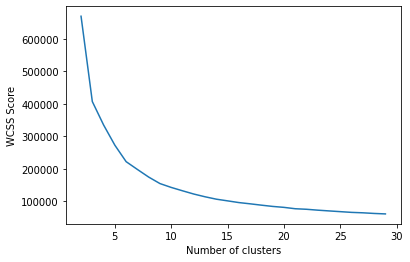

In [7]:
score=[]

iter = range(2,50)
iter = range(2,30)
for i in iter: 
    clust = i
    curr_model = KMeans(init="random", n_clusters=clust, n_init=10, max_iter=300).fit(train)
    
    score.append(curr_model.inertia_)

plt.plot(iter, score)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Score')
plt.show()

From the graph above, we determined the optimal numbers of clusters to be around 13. Based on this, we then build a KMeans model. Then, we fit the model based on the training set. 

In [8]:
kmeans = KMeans(
     init="random",
     n_clusters=13,
     n_init=10,
     max_iter=300,
     random_state=1
)

In [9]:
model = kmeans.fit(train)

To ensure the model was built properly, we then make predictions of the clusters on the testing set. However, because this is an unsupervised method, there is no best way to determine the accuracy of these labels.

In [33]:
preds = model.predict(test)


                                        uri  cluster
0      spotify:track:0qUnBLZ8bJqUNEeQgayL9t        1
1      spotify:track:08dQ920WdoLvM1iItUuflQ       10
2      spotify:track:29cvbkZWIWyMRJI7DD9n3w        2
3      spotify:track:2k9A31mxkvPhaDGJ87XwL3        1
4      spotify:track:7r99RxtSnML9oZ6imPXOid        9
...                                     ...      ...
13537  spotify:track:3SI9uxzQCSEfj7V1Qvf7nU        8
13538  spotify:track:5DrRvw69AtJ0PwVpEp22NO        0
13539  spotify:track:4zYBVaPx3EfZIUoNWFtdov        3
13540  spotify:track:2H6CBRyOXIHzajVrMGen3b        6
13541  spotify:track:4mVLzFbc3gaCoWCEENLouc       12

[13542 rows x 2 columns]


While there is no best way to determine the accuracy of our clusters, we found a couple ways to visualize the results. Using the TSNE method, we flatten the dataset to obtain a graph. Out of the possible features, we chose song key to plot against. However, "key" was only one of nine features that we used. Therefore, it would not make sense if the clusters were completely separated off of just this one feature. As we see, the clusters tend to stick together, but are not completely isolated.

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
flat_data = tsne.fit_transform(test)
projection = pd.DataFrame(columns=['x', 'y'], data=flat_data)
projection['keys'] = keys
projection['cluster'] = preds

In [9]:
import plotly.express as px
fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'keys'])
fig.show()

Then, we define a helper method that will utilize the linking map we created earlier. This method will take an input of a track and output the associated uri.

In [12]:
def get_uri(track):
    for key, value in uri_to_title_artist_map.items():
         if track == value:
             return key

Built a dataframe off of the test set with the uri and predicted cluster.

In [68]:
test_set = {"uri": test.index.values.tolist(), "cluster": preds}
clust_assign = pd.DataFrame(test_set)
print(clust_assign.head())

                                    uri  cluster
0  spotify:track:0qUnBLZ8bJqUNEeQgayL9t        1
1  spotify:track:08dQ920WdoLvM1iItUuflQ       10
2  spotify:track:29cvbkZWIWyMRJI7DD9n3w        2
3  spotify:track:2k9A31mxkvPhaDGJ87XwL3        1
4  spotify:track:7r99RxtSnML9oZ6imPXOid        9


This is a helper method to recommend a song based on an inputted track and artist. The method fetches the uri and then extracts its features. The model then predicts a cluster and looks for other songs in the same test set with the same cluster. It then prints out ten songs in the test set with the same cluster.

In [67]:
def recommend(track, artist):
    songs = []
    uri = get_uri((track, artist))
    features = df.loc[uri, :].tolist()

    clust = model.predict([features])[0]
    matches = clust_assign.loc[clust_assign['cluster'] == clust]
    matches = matches.reset_index()
    for i in range(10):
        curr = (matches.loc[i, 'uri'])
        songs.append(uri_to_title_artist_map[curr])
    return(songs)
    

The cell below is for the user to enter a song they want predictions for.

In [69]:
song_title = 'Brand New Key'
song_artist = 'Melanie'

Based on the entered song, the model then generates recommendations as described above.

In [71]:
print("Based our clustering model and the inputted song: " + song_title + " by " + song_artist)
songs = recommend(song_title, song_artist)
print("We recommend the following: ")
for i in range(len(songs)):
    print(songs[i])

Based our clustering model and the inputted song: Brand New Key by Melanie
We recommend the following: 
('Old & Gray', 'Maps & Atlases')
('"Goodbye So Soon"', 'Vincent Price')
('Santa Claus Is Coming To Town', 'Straight No Chaser')
('Ohio', 'Crosby, Stills, Nash & Young')
('Where Ever You Are (In the Style of Terry Ellis) [Karaoke Version]', 'The Karaoke Channel')
('When Will I See You Again', 'Lord Huron')
('Even When It Hurts (Praise Song)', 'Hillsong United')
('El Barco Que Se Hunde', 'Tommy Torres')
('War', 'Tunji Ige')
('Beneath The Moonlit Sky', 'Dave Koz')


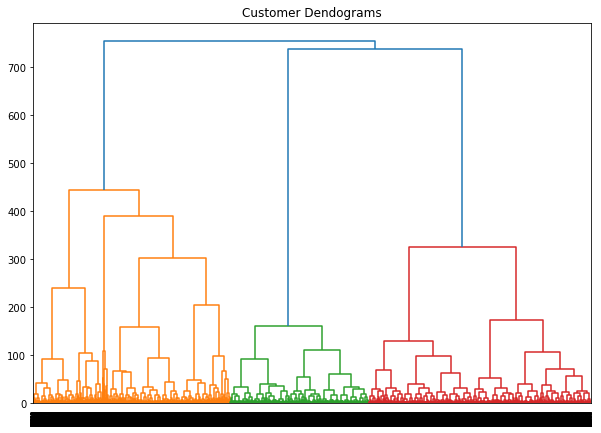

In [15]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Track Dendograms")
dend = shc.dendrogram(shc.linkage(train, method='ward'))

In [16]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=len(train), affinity='euclidean', linkage='ward')
c = cluster.fit_predict(train)